In [18]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
395,NaN,TA,129000
1125,TA,Fa,115000
290,Gd,Gd,233230
946,TA,TA,143000
1264,NaN,TA,181000


In [20]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [21]:
X = df
y = df['SalePrice']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [24]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
954,NaN,NaN,127500,NaN,NaN
749,NaN,TA,98000,TA,NaN
455,TA,TA,175500,TA,TA
215,Fa,TA,134450,TA,Fa
611,TA,TA,148000,TA,TA


In [25]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [26]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['Original', 'Imputed']

temp

,Original,Imputed
TA,0.951043,0.951199
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [27]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['Original', 'Imputed']

temp

,Original,Imputed
Gd,0.494272,0.396575
TA,0.412439,0.331507
Fa,0.040917,0.031507
Po,0.027823,0.021918
Ex,0.024550,0.018493


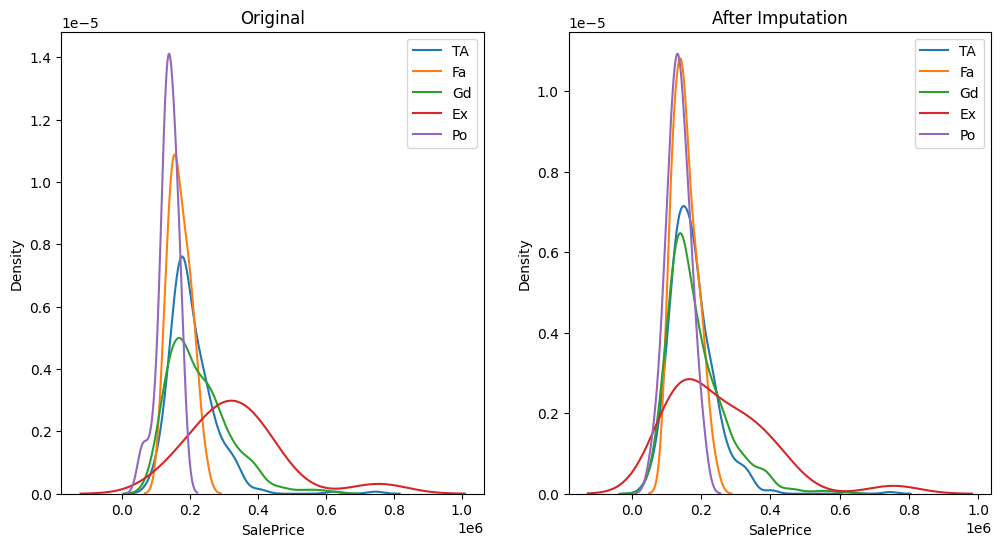

In [35]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category, ax=ax1)


for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category, ax=ax2)

ax1.legend()
ax1.set_title("Original")

ax2.legend()
ax2.set_title("After Imputation")

plt.show()